In [50]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
df = pd.read_csv('House-Price (1).csv')

In [52]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [53]:
#from pandas_profiling import ProfileReport

In [54]:
#profile = ProfileReport(df)

In [55]:
#profile

In [56]:
df.shape

(21613, 21)

In [57]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [58]:
df.duplicated().sum()

0

In [59]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
UL=Q3+(1.5*IQR)
LL=Q1-(1.5*IQR)

In [60]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [61]:
#df['date']=df['date'].str[0:8]

In [62]:
df['date']=pd.to_datetime(df['date'],errors='coerce')

In [63]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [64]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [65]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [66]:
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['year'] = df['date'].dt.year

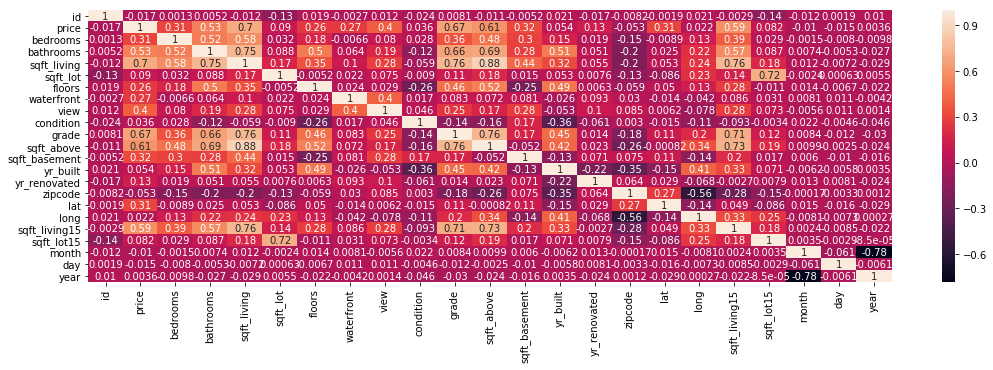

In [67]:
plt.figure(figsize=(18,5))
sns.heatmap(df.corr(),annot=True)

In [68]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month', 'day', 'year'],
      dtype='object')

In [69]:
import statsmodels.formula.api as smapi

In [70]:
model = smapi.ols(formula='''price~bedrooms+bathrooms+sqft_living+
sqft_lot+waterfront+view+condition+grade+sqft_basement+yr_built+yr_renovated+zipcode+lat+
long+sqft_living15+sqft_lot15+day+year''',data=df).fit()

In [71]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2816.
Date:                Thu, 30 Jul 2020   Prob (F-statistic):               0.00
Time:                        21:38:07   Log-Likelihood:            -2.9456e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21594   BIC:                         5.893e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.529e+07   6.58e+06     -8.399      0.000   -6.82e+07   -4.24e+07
bedrooms      -3.614e+04   1887.771    -19.145      0.000   -3.98e+04   -3.24e+04
bathrooms      4.303e+04   3136.051     13.720      0.000    3.69e+04    4.92e+04
sqft_living     182.7597      3.614     50.568      0.000     175.676     189.844
sqft_lot          0.1229      0.048      2.570      0.010       0.029       0.217
waterfront     5.841e+05   1.73e+04     33.706      0.000     5.5e+05    6.18e+05
view           5.275e+04   2135.889     24.695      0.000    4.86e+04    5.69e+04
condition      2.739e+04   2346.554     11.672      0.000    2.28e+04     3.2e+04
grade          9.652e+04   2140.742     45.088      0.000    9.23e+04    1.01e+05
sqft_basement   -34.9938      3.903     -8.965      0.000     -42.645     -27.343
yr_built      -2589.7841     70.785    -36.586      0.000   -2728.529   -2451.040
yr_renovated     21.2200      3.645      5.822      0.000      14.076      28.364
zipcode        -577.3954     32.782    -17.613      0.000    -641.650    -513.140
lat            6.069e+05   1.07e+04     56.816      0.000    5.86e+05    6.28e+05
long          -2.175e+05   1.31e+04    -16.654      0.000   -2.43e+05   -1.92e+05
sqft_living15    20.9558      3.420      6.128      0.000      14.253      27.659
sqft_lot15       -0.3852      0.073     -5.271      0.000      -0.528      -0.242
day            -376.8008    158.326     -2.380      0.017    -687.131     -66.471
year           3.023e+04   2930.108     10.318      0.000    2.45e+04     3.6e+04
==============================================================================
Omnibus:                    18346.223   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1867546.923
Skew:                           3.553   Prob(JB):                         0.00
Kurtosis:                      47.981   Cond. No.                     4.85e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.85e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
x=df.drop(['price','date'],axis=1)
y=df['price']


In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=8)

In [74]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train) 
y_pred = regressor.predict(x_test)

In [75]:
y_pred

array([445000., 505000., 169000., ..., 785000., 465500., 335000.])

In [76]:
from sklearn.metrics import mean_squared_error, r2_score

In [77]:
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))

Mean squared error: 31884721316.98


In [78]:
print('Test Variance score: %.2f' % r2_score(y_test, y_pred))

Test Variance score: 0.76


In [79]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV 

In [80]:
depth = np.arange(1,30)
param_dist = {"max_depth":depth, 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9)}
tree_cv = RandomizedSearchCV(regressor, param_dist, cv = 5)
tree_cv.fit(x_train, y_train)
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 21, 'max_features': 8, 'min_samples_leaf': 5}
Best score is 0.7389660938149691


In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [82]:
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns

C:\Users\Ashish\Anaconda3\envs\python\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [83]:
vif.round()

,VIF Factor,features
0,4.0,id
1,2.0,bedrooms
2,3.0,bathrooms
3,inf,sqft_living
4,2.0,sqft_lot
5,2.0,floors
6,1.0,waterfront
7,1.0,view
8,1.0,condition
9,3.0,grade


In [84]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(x_train)
X_test = sc_X.transform(x_test)
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)
r_squared=r2_score(y_test,y_pred)
r_squared

0.7078676380221367

In [85]:
depth = np.arange(1,30)
param_dist = {"max_depth":depth, 
              "max_features": randint(1, 9),
              'criterion':['mse','mae'],
              "min_samples_leaf": randint(1, 9)}
tree_cv = RandomizedSearchCV(regressor, param_dist, cv = 5)
tree_cv.fit(X_train, y_train)
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'mse', 'max_depth': 21, 'max_features': 7, 'min_samples_leaf': 7}
Best score is 0.7387621637804069


In [86]:
from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor(n_estimators=150,criterion='mse',
                                    max_leaf_nodes=12,random_state=15)

rf.fit(x_train,y_train)
y_pred_test = rf.predict(x_test)
y_pred_train = rf.predict(x_train)
r_squared=r2_score(y_test,y_pred_test)
r_squared

0.7243976488371431